In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [269]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\Decision-Tree-Quiz\Decision Tree Quiz\Pokemon.csv")
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [270]:
df['Generation'].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

In [271]:
df['Defense'].unique()

array([ 49,  63,  83, 123,  43,  58,  78, 111,  65,  80, 100, 120,  35,
        55,  50,  30,  40,  75,  60,  44,  69,  85, 110,  52,  67,  87,
        57,  77,  48,  73,  20,  45,  70,  25,  95,  15, 115, 130, 180,
       160,  90,  53,  79,   5, 109, 125, 105,  64,  34,  38,  28,  42,
       140, 200, 230,  62,  37,  10, 150,  41,  61,  32,  23, 135,  97,
        71,  68,  88,  51, 118, 168, 102,  66,  84,  94,  47,  86, 116,
       108,  72,  56,  76, 145, 107, 106,  39, 126,  59,  99,  89, 103,
       133,  82,  91, 131, 112, 129, 122,  54,  33, 119, 184, 121],
      dtype=int64)

In [272]:
(df['Defense'] == 230).sum()

3

<Axes: >

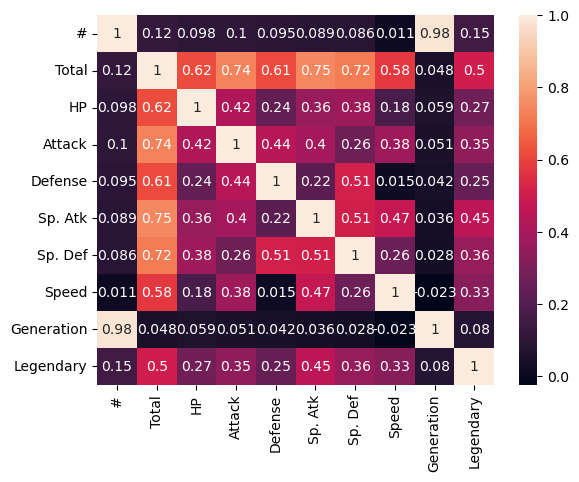

In [273]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

In [274]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [275]:
df['Type 2'].value_counts()

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

In [276]:
(df['Type 2'] == '?').sum()

0

In [277]:
df.dropna(inplace = True)

In [278]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [279]:
df.columns[df.isin(['?']).any()]

Index([], dtype='object')

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [281]:
le = LabelEncoder()
for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = le.fit_transform(df[x])
        print(le.classes_, le.transform(le.classes_))
        print()

df.head()

['Abomasnow' 'AbomasnowMega Abomasnow' 'AegislashBlade Forme'
 'AegislashShield Forme' 'Aerodactyl' 'AerodactylMega Aerodactyl' 'Aggron'
 'Altaria' 'AltariaMega Altaria' 'Amaura' 'Amoonguss'
 'AmpharosMega Ampharos' 'Anorith' 'Archen' 'Archeops' 'Ariados' 'Armaldo'
 'Aron' 'Articuno' 'AudinoMega Audino' 'Aurorus' 'Azumarill' 'Azurill'
 'Baltoy' 'Barbaracle' 'Barboach' 'Bastiodon' 'Beautifly' 'Beedrill'
 'BeedrillMega Beedrill' 'Beldum' 'Bellsprout' 'Bibarel' 'Binacle'
 'Bisharp' 'Blaziken' 'BlazikenMega Blaziken' 'Braviary' 'Breloom'
 'Bronzong' 'Bronzor' 'Budew' 'Bulbasaur' 'Butterfree' 'Cacturne'
 'Camerupt' 'CameruptMega Camerupt' 'Carbink' 'Carracosta' 'Carvanha'
 'Celebi' 'Chandelure' 'Charizard' 'CharizardMega Charizard X'
 'CharizardMega Charizard Y' 'Chatot' 'Chesnaught' 'Chinchou' 'Claydol'
 'Cloyster' 'Cobalion' 'Combee' 'Combusken' 'Corsola' 'Cottonee' 'Cradily'
 'Crawdaunt' 'Croagunk' 'Crobat' 'Crustle' 'DarmanitanZen Mode' 'Dedenne'
 'Deerling' 'Deino' 'Delibird' 'Delphox'

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,42,9,13,318,45,49,49,65,65,45,1,False
1,2,166,9,13,405,60,62,63,80,80,60,1,False
2,3,379,9,13,525,80,82,83,100,100,80,1,False
3,3,380,9,13,625,80,100,123,122,120,80,1,False
6,6,52,6,7,534,78,84,78,109,85,100,1,False


In [282]:
df['Legendary'].dtype

dtype('bool')

In [283]:
for x in df.columns:
    if df[x].dtype == 'bool':
        df[x] = le.fit_transform(df[x])
        print(le.classes_, le.transform(le.classes_))
        print()

df.head()

[False  True] [0 1]



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,42,9,13,318,45,49,49,65,65,45,1,0
1,2,166,9,13,405,60,62,63,80,80,60,1,0
2,3,379,9,13,525,80,82,83,100,100,80,1,0
3,3,380,9,13,625,80,100,123,122,120,80,1,0
6,6,52,6,7,534,78,84,78,109,85,100,1,0


In [284]:
X = df.drop(columns = 'Legendary', axis = 1)
y = df['Legendary']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [286]:
dt = DecisionTreeClassifier()

In [287]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [288]:
y_pred = dt.predict(X_test)

In [289]:
accuracy_score(y_test, y_pred)

0.968

In [290]:
from sklearn.metrics import recall_score

In [291]:
recall_score(y_test, y_pred)

0.6363636363636364

In [292]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [293]:
misclassified_data = fp + fn
misclassified_data

4

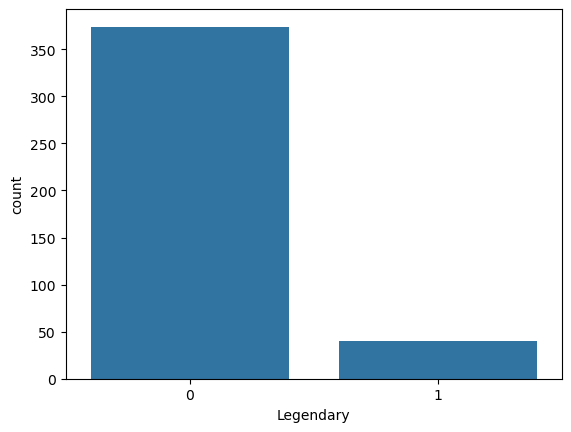

In [294]:
sns.countplot(x = 'Legendary', data = df)
plt.show()

In [295]:
# The target column is categorical, so based on the above visualisation, we can infer that the data is unbalanced. 

In [296]:
df2 = pd.read_csv(r"C:\Users\Pooja\Downloads\Decision-Tree-Quiz\Decision Tree Quiz\diabetes.csv")
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [297]:
# Count each category
low = (df2['BloodPressure'] < 80).sum()
normal = ((df2['BloodPressure'] >= 80) & (df2['BloodPressure'] <= 120)).sum()
high = (df2['BloodPressure'] > 120).sum()

# Total
total = low + normal + high

# Probabilities
p_low = low / total
p_normal = normal / total
p_high = high / total

# Entropy
import math
entropy = - (p_low * math.log2(p_low + 1e-10) + p_normal * math.log2(p_normal + 1e-10) + p_high * math.log2(p_high + 1e-10))

print(entropy)

0.848893794737105


<Axes: xlabel='Pregnancies', ylabel='count'>

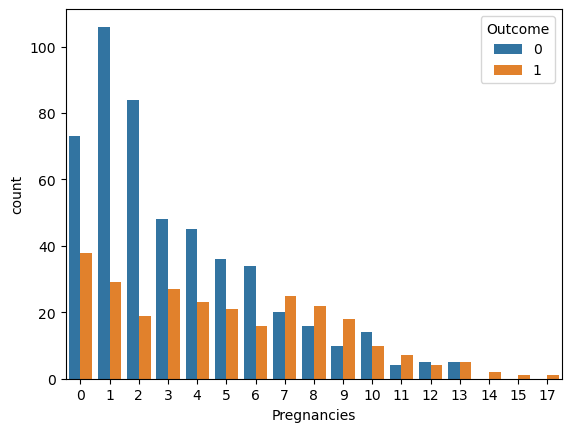

In [298]:
pregancy_data=df2.groupby(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count")
sns.barplot(data=pregancy_data,x='Pregnancies',y='count',hue='Outcome')

In [299]:
def entropy(series):
    probs = series.value_counts(normalize=True)
    return -sum(probs * probs.apply(lambda p: math.log2(p + 1e-10)))

columns = ['BMI', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin']
entropies = {col: entropy(df2[col]) for col in columns}
highest_entropy_column = max(entropies, key=entropies.get)

print(highest_entropy_column)

DiabetesPedigreeFunction


In [300]:
# Define features and target
X = df2[['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'BloodPressure']]
y = df2['Outcome']

# Fit decision tree
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X, y)

# Get feature with highest info gain (root node)
print(X.columns[dt.feature_importances_.argmax()])

Glucose


In [301]:
def gini(series):
    probs = series.value_counts(normalize=True)
    return 1 - sum(probs ** 2)

columns = ['DiabetesPedigreeFunction', 'Insulin', 'Pregnancies', 'BMI']
gini_values = {col: gini(df2[col]) for col in columns}
lowest_gini_column = min(gini_values, key=gini_values.get)

print(lowest_gini_column)

Insulin
